# TP1 - Redes Neuronales

En el primer TP se utilizará el dataset Yeast (https://archive.ics.uci.edu/ml/datasets/Yeast).

Escencialmente es un dataset para construir un clasificador de proteínas en sitios específicos de células de levaduras basado en información de las secuencias de aminoácidos (problema de clasificación multiclase).

Inicialmente se requiere hacer un análisis exploratorio de datos (EDA) para ganar conocimiento de la estadística de los datos y relaciones elementales entre ellos. Para ello se requiere hacer: Explorar el balance de clases, correlaciones de a pares de las variables e histogramas, discriminando por clase.

Para hacer el EDA se recomienda el uso de la librería de Python Pandas para manipular y estructurar los datos y las librerías de Matplotlib y/o Seaborn para hacer la visualización.

Mediante la librería scikit-learn de Python aplicar los modelos vistos en clase para desarollar un clasificador multiclase.

Entregar una notebook de python con todo el desarrollo del EDA y del/los modelo/s de clasificación. Evaluar métricas de micro-macro F1-score. La entrega debe ser subiendo el notebook de Jupyter o notebook de Google Colab a una cuenta de Github y notificar la entrega.

A partir del dataset original, armar un dataset para resolver un problema de clasificación binario. Para ello se pueden unificar clases con algún criterio que lo justifique o tomar las dos clases más representativas. Entrenar un modelo para resolver este nuevo problema binario y evaluar las métricas AUC-ROC.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import chi2

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense

## Yeast

El archivo yeast.data es un txt separado por tabs. Lo modifique manualmente para poder leerlo de forma correcta: le puse nombres a las columnas, cambie los espacios por comas para que sea un csv.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/yeast.csv')
print(data)

     Secuence_Name   MCG   GVH   ALM   MIT  ERK  POX   VAC   NUC  \
0       ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   
1       ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   
2       ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   
3       AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   
4       AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   
...            ...   ...   ...   ...   ...  ...  ...   ...   ...   
1479    YUR1_YEAST  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22   
1480    ZIP1_YEAST  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47   
1481    ZNRP_YEAST  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22   
1482    ZUO1_YEAST  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39   
1483    G6PD_YEAST  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22   

     Class_Distribution  
0                   MIT  
1                   MIT  
2                   MIT  
3                   NUC  
4                   MIT  
...                 ...  
1

### Analisis Exploratorio de Datos

In [ ]:
df = pd.DataFrame(data)
print(df)

     Secuence_Name   MCG   GVH   ALM   MIT  ERK  POX   VAC   NUC  \
0       ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   
1       ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   
2       ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   
3       AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   
4       AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   
...            ...   ...   ...   ...   ...  ...  ...   ...   ...   
1479    YUR1_YEAST  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22   
1480    ZIP1_YEAST  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47   
1481    ZNRP_YEAST  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22   
1482    ZUO1_YEAST  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39   
1483    G6PD_YEAST  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22   

     Class_Distribution  
0                   MIT  
1                   MIT  
2                   MIT  
3                   NUC  
4                   MIT  
...                 ...  
1

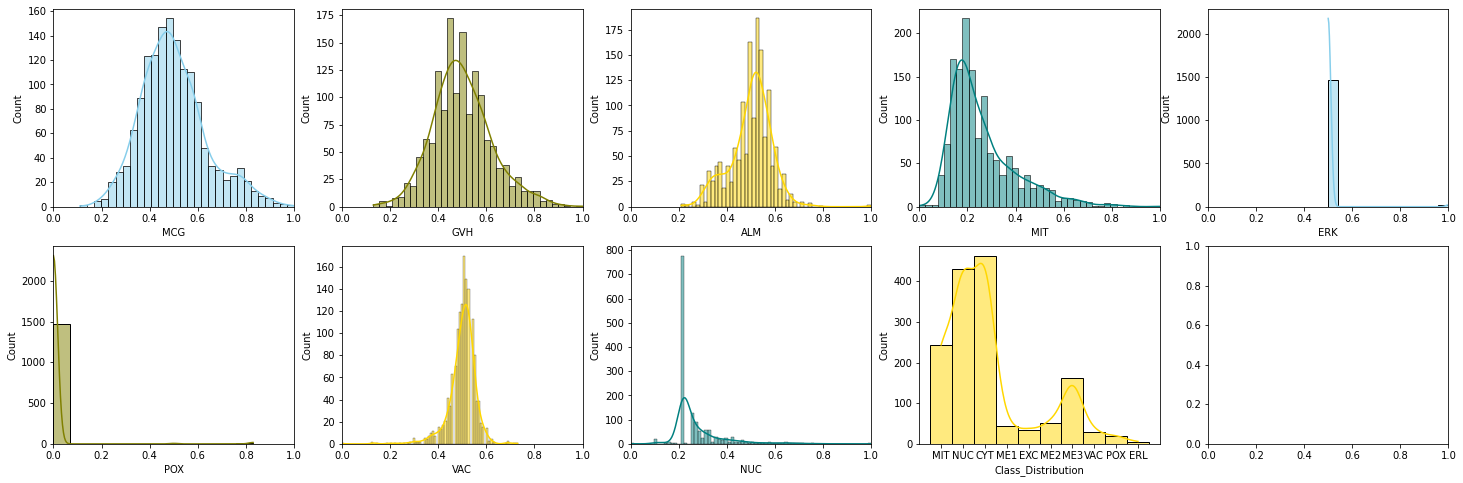

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(25, 8))

sns.histplot(data=df, x="MCG", kde=True, color="skyblue", ax=axs[0, 0]).set_xlim(0, 1)
sns.histplot(data=df, x="GVH", kde=True, color="olive", ax=axs[0, 1]).set_xlim(0, 1)
sns.histplot(data=df, x="ALM", kde=True, color="gold", ax=axs[0, 2]).set_xlim(0, 1)
sns.histplot(data=df, x="MIT", kde=True, color="teal", ax=axs[0, 3]).set_xlim(0, 1)
sns.histplot(data=df, x="ERK", kde=True, color="skyblue", ax=axs[0, 4]).set_xlim(0, 1)
sns.histplot(data=df, x="POX", kde=True, color="olive", ax=axs[1, 0]).set_xlim(0, 1)
sns.histplot(data=df, x="VAC", kde=True, color="gold", ax=axs[1, 1]).set_xlim(0, 1)
sns.histplot(data=df, x="NUC", kde=True, color="teal", ax=axs[1, 2]).set_xlim(0, 1)
sns.histplot(data=df, x="Class_Distribution", kde=True, color="gold", ax=axs[1, 3])

plt.show()

Los datos de POX, ERK y NUC no se pueden ver de forma correcta en un histograma. 

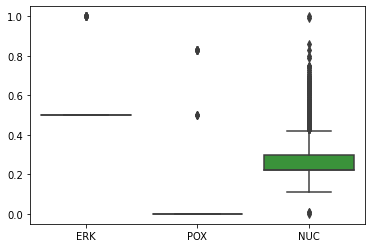

In [ ]:
sns.boxplot(data=df.loc[:, ['ERK', 'POX','NUC']])
plt.show()

Se llevan estos datos a números para poder analizarlos de otra manera.

In [ ]:
df.describe()

,MCG,GVH,ALM,MIT,ERK,POX,VAC,NUC
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


Ahora se va a analizar los datos pero no desde el punto de vista de los parámetros, si no que desde las clases que están dadas por la base de datos. Las clases que van a ser analizadas son MIT, NUC, CYT y ME3 ya que estan son las que poseen mayor cantidad de datos por una diferencia notable. Esta cantidad de datos es relevante para poder tener data suficiente como para entrenar al modelo y para testearlo.

Se modifica el data frame para poder analizarlo de esta manera.

In [ ]:
df_cut = df[df['Class_Distribution'].isin(['NUC','CYT','MIT','ME3'])]

Se realiza un pairplot para poder ver que variables diferencian mas a cada clase del resto.

<Figure size 432x288 with 0 Axes>

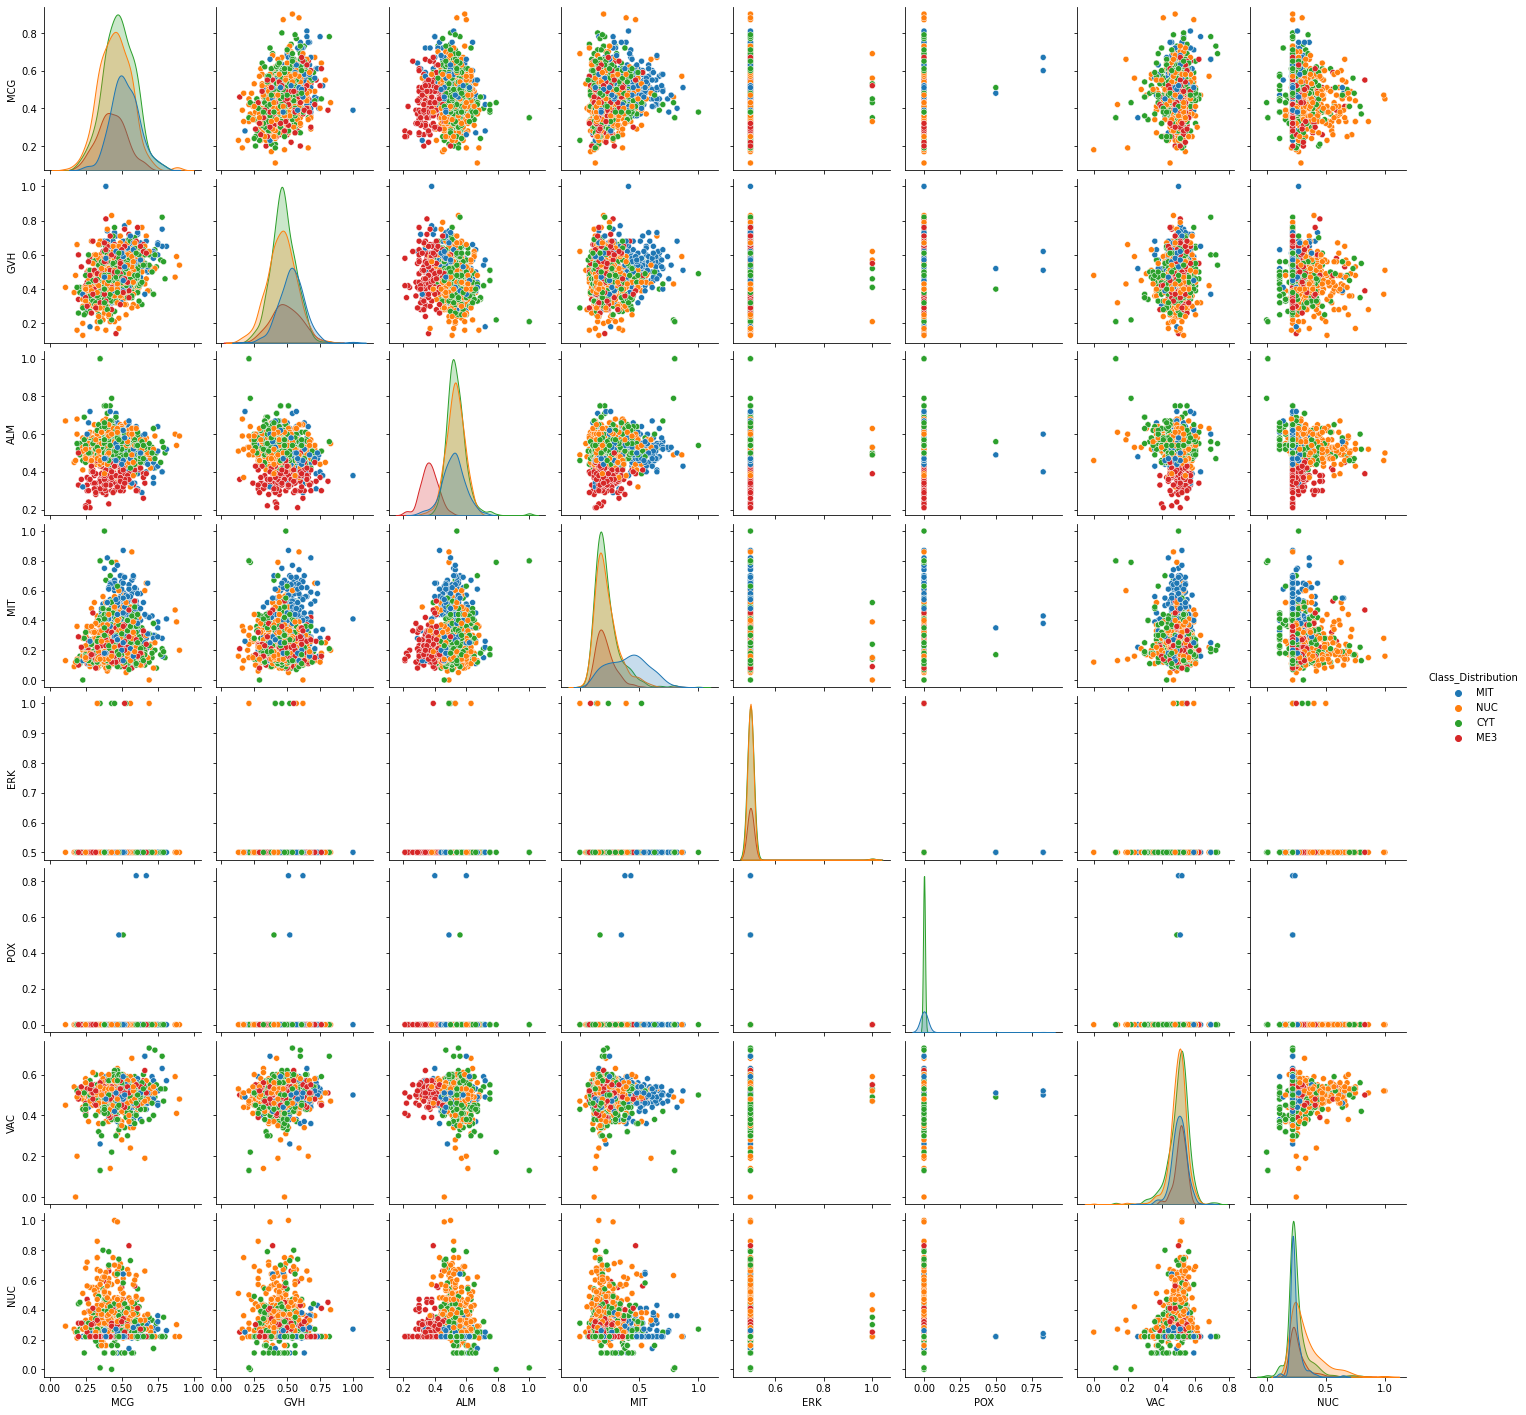

In [ ]:
plt.figure()
sns.pairplot(df_cut,hue='Class_Distribution')
plt.show()

En la imagen anterior se puede ver claramente que ERK y POX son atributos que no presentan información valuable ya que son extremadamente repetitivos y no hacen diferencia por clase. Se procede a eliminarlos del dataframe.

In [ ]:
# ERK y POX no aportan informacion distinta para las distintas clases, entonces se sacan
df_cut.drop('ERK', axis=1, inplace=True)
df_cut.drop('POX', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Clasificadores

Primero se acondicionan los datos de manera que los algoritmos de la librería scikit learn los pueda leer. Luego se utilizarán algoritmos de 


In [ ]:
features_yeast = ['MCG','GVH','ALM','MIT','VAC','NUC']
data_new = SelectKBest(k=4).fit_transform(df_cut[features_yeast],df_cut['Class_Distribution'])
x_train, x_test, y_train, y_test = train_test_split(data_new,df_cut['Class_Distribution'],train_size=0.7,stratify = df_cut['Class_Distribution'])

#### Quadratic Discriminant Analysis

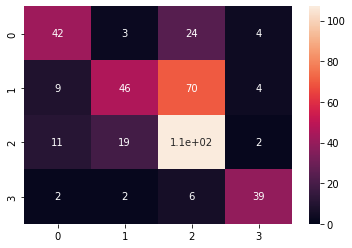

In [ ]:
clf_qda = QuadraticDiscriminantAnalysis()
clf_qda.fit(x_train,y_train)
predict = clf_qda.predict(x_test)
mat_conf = sklearn.metrics.confusion_matrix(y_test,predict,labels=['MIT', 'NUC', 'CYT', 'ME3'])
plt.figure()
sns.heatmap(mat_conf,annot=True,vmin=0, vmax=mat_conf.max())
plt.show()


In [ ]:
cv = cross_validate(estimator=QuadraticDiscriminantAnalysis(),X=data_new,y=df_cut['Class_Distribution'],cv= 10,scoring=('f1_micro','f1_macro'))
macro_test = np.mean(cv['test_f1_macro'])
micro_test = np.mean(cv['test_f1_micro'])

print("Macro: ",macro_test)
print("Micro: ",micro_test)

Macro:  0.626098806661314
Micro:  0.595098389982111


Dividiendo por  5.0  clases se obtiene el mejor resultado donde macro= 0.6454121844591418 y macro= 0.6165354800238522


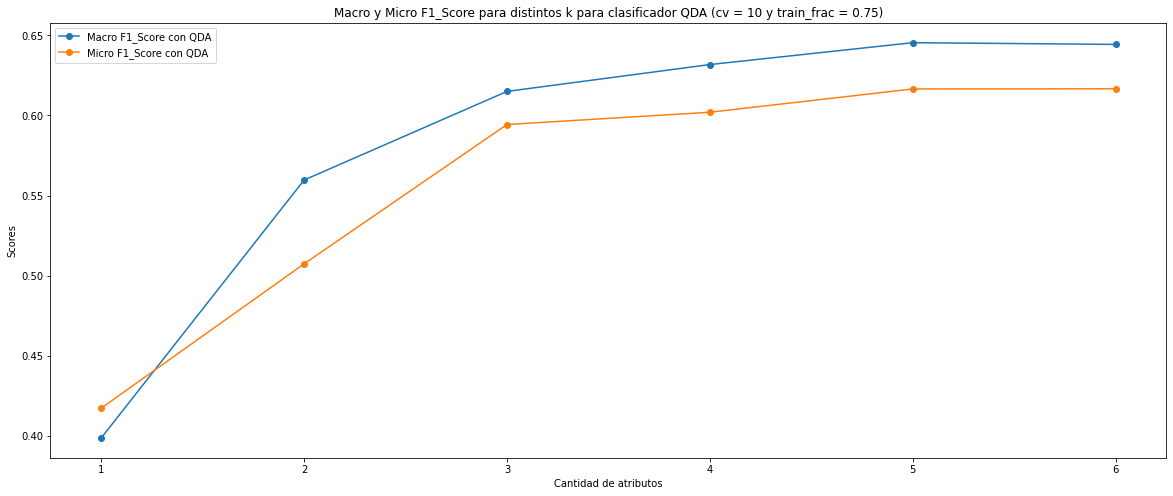

In [ ]:
#Variando k en QDA
cv_k = 10
frac_k = 0.75
metricas_k = []
metrica_micro = []
metrica_macro = []
x_k = np.linspace(1,6,6)

for i in x_k:
  qda_sample = df_cut.sample(frac=1)
  kbest_k = SelectKBest(k=int(i)).fit_transform(qda_sample[features_yeast],qda_sample['Class_Distribution'])
  cv_vk = cross_validate(estimator=QuadraticDiscriminantAnalysis(),X=kbest_k,y=qda_sample['Class_Distribution'],cv=cv_k,scoring=('f1_micro','f1_macro'))
  metrica = [np.mean(cv_vk['test_f1_macro']), np.mean(cv_vk['test_f1_micro'])]
  metricas_k.append(metrica)
  metrica_max = max(metricas_k)
  metrica_micro.append(np.mean(cv_vk['test_f1_micro']))
  metrica_macro.append(np.mean(cv_vk['test_f1_macro']))

  if metrica == metrica_max:
    k_max = i

print("Dividiendo por ",k_max," clases se obtiene el mejor resultado donde macro=",metrica_max[0], "y macro=",metrica_max[1])

plt.figure(figsize=(20,8))
plt.plot(x_k,metricas_k,'-o')
plt.title(f'Macro y Micro F1_Score para distintos k para clasificador QDA (cv = {cv_k} y train_frac = {frac_k})')
plt.xlabel('Cantidad de atributos')
plt.ylabel('Scores')
plt.legend(['Macro F1_Score con QDA','Micro F1_Score con QDA'])
plt.show()

Dividiendo por  10.0  clases se obtiene el mejor resultado donde macro= 0.6455696575961116 y macro= 0.6173941562313655


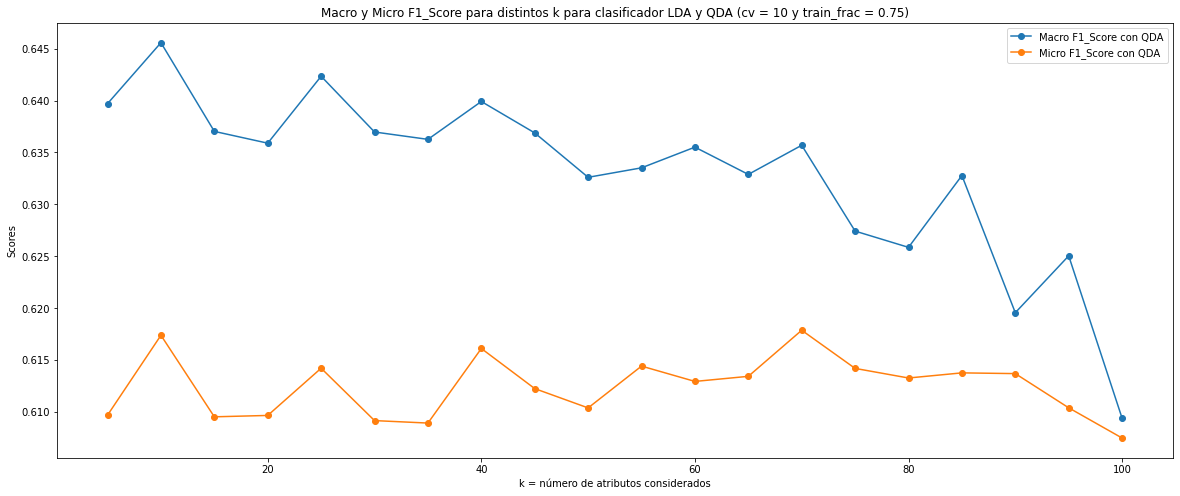

In [ ]:
#Variando cv en QDA

frac_k = 0.75
metricas_k = []
metrica_micro = []
metrica_macro = []

x = np.linspace(5,100,20)

for i in x:
  qda_sample = df_cut.sample(frac=1)
  kbest_k = SelectKBest(k=5).fit_transform(qda_sample[features_yeast],qda_sample['Class_Distribution'])
  cv_vk = cross_validate(estimator=QuadraticDiscriminantAnalysis(),X=kbest_k,y=qda_sample['Class_Distribution'],cv=int(i),scoring=('f1_micro','f1_macro'))
  metrica = [np.mean(cv_vk['test_f1_macro']), np.mean(cv_vk['test_f1_micro'])]
  metricas_k.append(metrica)
  metrica_max = max(metricas_k)
  metrica_micro.append(np.mean(cv_vk['test_f1_micro']))
  metrica_macro.append(np.mean(cv_vk['test_f1_macro']))

  if metrica == metrica_max:
    k_max = i

print("Dividiendo por ",k_max," clases se obtiene el mejor resultado donde macro=",metrica_max[0], "y macro=",metrica_max[1])

plt.figure(figsize=(20,8))
plt.plot(x,metricas_k,'-o')
plt.title(f'Macro y Micro F1_Score para distintos k para clasificador LDA y QDA (cv = {cv_k} y train_frac = {frac_k})')
plt.xlabel('k = número de atributos considerados')
plt.ylabel('Scores')
plt.legend(['Macro F1_Score con QDA','Micro F1_Score con QDA'])
plt.show()

#### Linear Discriminant Analysis

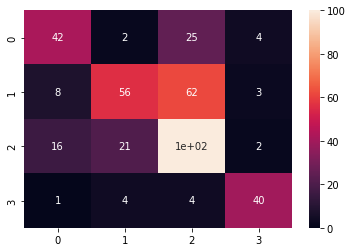

In [ ]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(x_train,y_train)
predict_lda = clf_lda.predict(x_test)
mat_conf_lda = sklearn.metrics.confusion_matrix(y_test,predict_lda,labels=['MIT', 'NUC', 'CYT', 'ME3'])
plt.figure()
sns.heatmap(mat_conf_lda,annot=True,vmin=0, vmax=mat_conf_lda.max())
plt.show()

In [ ]:
cv_lda = cross_validate(estimator=LinearDiscriminantAnalysis(),X=data_new,y=df_cut['Class_Distribution'],cv= 10,scoring=('f1_micro','f1_macro'))
macro_test_lda = np.mean(cv_lda['test_f1_macro'])
micro_test_lda = np.mean(cv_lda['test_f1_micro'])

print("Macro: ",macro_test_lda)
print("Micro: ",micro_test_lda)

Macro:  0.6421104803106384
Micro:  0.6143470483005367


Dividiendo por  6.0  clases se obtiene el mejor resultado donde macro= 0.6533198958099173 y macro= 0.6228324388789506


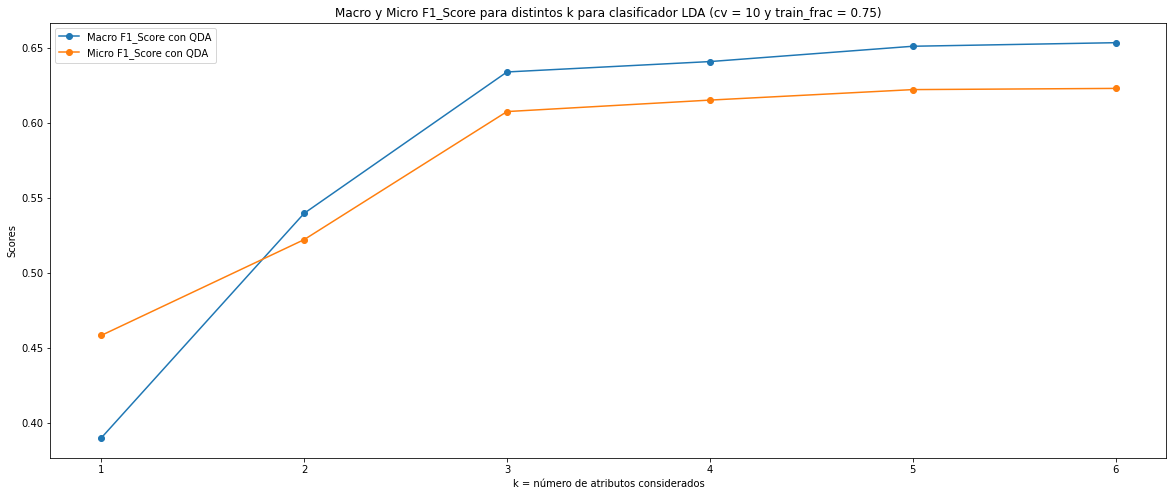

In [ ]:
#Variando k en LDA

cv_k = 10
frac_k = 0.75
metricas_k = []
metrica_micro = []
metrica_macro = []
x_k = np.linspace(1,6,6)

for i in x_k:
  lda_sample = df_cut.sample(frac=1)
  kbest_k = SelectKBest(k=int(i)).fit_transform(lda_sample[features_yeast],lda_sample['Class_Distribution'])
  cv_vk = cross_validate(estimator=LinearDiscriminantAnalysis(),X=kbest_k,y=lda_sample['Class_Distribution'],cv=cv_k,scoring=('f1_micro','f1_macro'))
  metrica = [np.mean(cv_vk['test_f1_macro']), np.mean(cv_vk['test_f1_micro'])]
  metricas_k.append(metrica)
  metrica_max = max(metricas_k)
  metrica_micro.append(np.mean(cv_vk['test_f1_micro']))
  metrica_macro.append(np.mean(cv_vk['test_f1_macro']))

  if metrica == metrica_max:
    k_max = i

print("Dividiendo por ",k_max," clases se obtiene el mejor resultado donde macro=",metrica_max[0], "y macro=",metrica_max[1])

plt.figure(figsize=(20,8))
plt.plot(x_k,metricas_k,'-o')
plt.title(f'Macro y Micro F1_Score para distintos k para clasificador LDA (cv = {cv_k} y train_frac = {frac_k})')
plt.xlabel('k = número de atributos considerados')
plt.ylabel('Scores')
plt.legend(['Macro F1_Score con QDA','Micro F1_Score con QDA'])
plt.show()

Dividiendo por  15.0  clases se obtiene el mejor resultado donde macro= 0.6441648751026208 y macro= 0.614247527399091


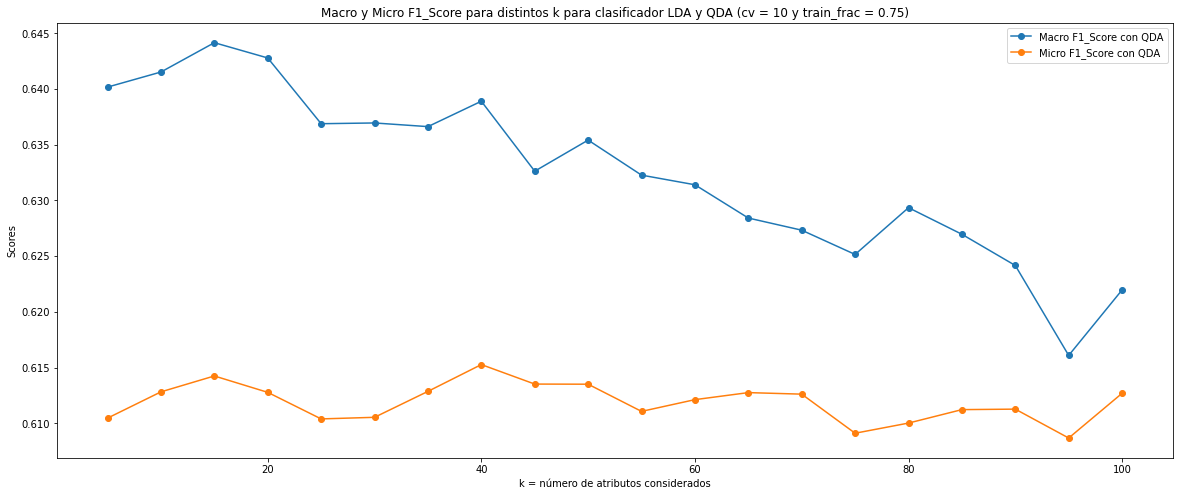

In [ ]:
#Variando cv en LDA

frac_k = 0.75
metricas_k = []
metrica_micro = []
metrica_macro = []

x = np.linspace(5,100,20)

for i in x:
  lda_sample = df_cut.sample(frac=1)
  kbest_k = SelectKBest(k=5).fit_transform(lda_sample[features_yeast],lda_sample['Class_Distribution'])
  cv_vk = cross_validate(estimator=QuadraticDiscriminantAnalysis(),X=kbest_k,y=lda_sample['Class_Distribution'],cv=int(i),scoring=('f1_micro','f1_macro'))
  metrica = [np.mean(cv_vk['test_f1_macro']), np.mean(cv_vk['test_f1_micro'])]
  metricas_k.append(metrica)
  metrica_max = max(metricas_k)
  metrica_micro.append(np.mean(cv_vk['test_f1_micro']))
  metrica_macro.append(np.mean(cv_vk['test_f1_macro']))

  if metrica == metrica_max:
    k_max = i

print("Dividiendo por ",k_max," clases se obtiene el mejor resultado donde macro=",metrica_max[0], "y macro=",metrica_max[1])

plt.figure(figsize=(20,8))
plt.plot(x,metricas_k,'-o')
plt.title(f'Macro y Micro F1_Score para distintos k para clasificador LDA y QDA (cv = {cv_k} y train_frac = {frac_k})')
plt.xlabel('k = número de atributos considerados')
plt.ylabel('Scores')
plt.legend(['Macro F1_Score con QDA','Micro F1_Score con QDA'])
plt.show()

#### Clasificacion binaria

Para poder utilizar algoritmos de clasificación binaria se eligen 2 clases mas numerosas. AL ser binario, los algoritmos para calcular AUC ROC se pueden utilizar.

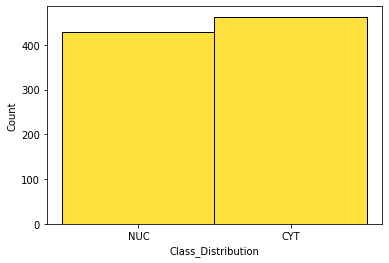

In [ ]:
df_binario = df_cut[df_cut['Class_Distribution'].isin(['NUC','CYT'])]
sns.histplot(data=df_binario, x="Class_Distribution", color="gold")

In [ ]:
bin_sample = df_binario.sample(frac=1)
clf = LogisticRegression(max_iter=1000)
array_macro = []
array_micro = []
array_auc = []

# k = 3

kbest_3 = SelectKBest(k=3).fit_transform(bin_sample[features_yeast],bin_sample['Class_Distribution'])
cv_3 = cross_validate(estimator=clf,X=kbest_3,y=bin_sample['Class_Distribution'],cv=6,scoring=('f1_micro','f1_macro','roc_auc'))
macro_test = np.mean(cv_3['test_f1_macro'])
micro_test = np.mean(cv_3['test_f1_micro'])
auc = np.mean(cv_3['test_roc_auc'])
array_macro.append(macro_test)
array_micro.append(micro_test)
array_auc.append(auc)

print("Usando 3 atributos los resultados del clasificador son: ")
print("Macro =",macro_test)
print("Micro =",micro_test)
print("AUC ROC =",auc)
print("-------------------------------------------------------")

# k = 4
kbest_4 = SelectKBest(k=4).fit_transform(bin_sample[features_yeast],bin_sample['Class_Distribution'])
cv_4 = cross_validate(estimator=clf,X=kbest_4,y=bin_sample['Class_Distribution'],cv=6,scoring=('f1_micro','f1_macro','roc_auc'))
macro_test = np.mean(cv_4['test_f1_macro'])
micro_test = np.mean(cv_4['test_f1_micro'])
auc = np.mean(cv_4['test_roc_auc'])
array_macro.append(macro_test)
array_micro.append(micro_test)
array_auc.append(auc)

print("Usando 4 atributos los resultados del clasificador son: ")
print("Macro =",macro_test)
print("Micro =",micro_test)
print("AUC ROC =",auc)
print("-------------------------------------------------------")

# k = 5
kbest_5 = SelectKBest(k=5).fit_transform(bin_sample[features_yeast],bin_sample['Class_Distribution'])
cv_5 = cross_validate(estimator=clf,X=kbest_5,y=bin_sample['Class_Distribution'],cv=6,scoring=('f1_micro','f1_macro','roc_auc'))
macro_test = np.mean(cv_5['test_f1_macro'])
micro_test = np.mean(cv_5['test_f1_micro'])
auc = np.mean(cv_5['test_roc_auc'])
array_macro.append(macro_test)
array_micro.append(micro_test)
array_auc.append(auc)

print("Usando 5 atributos los resultados del clasificador son: ")
print("Macro =",macro_test)
print("Micro =",micro_test)
print("AUC ROC =",auc)
print("-------------------------------------------------------")

# k = 6
kbest_6 = SelectKBest(k=6).fit_transform(bin_sample[features_yeast],bin_sample['Class_Distribution'])
cv_6 = cross_validate(estimator=clf,X=kbest_6,y=bin_sample['Class_Distribution'],cv=6,scoring=('f1_micro','f1_macro','roc_auc'))
macro_test = np.mean(cv_6['test_f1_macro'])
micro_test = np.mean(cv_6['test_f1_micro'])
auc = np.mean(cv_6['test_roc_auc'])

print("Usando 6 atributos los resultados del clasificador son: ")
print("Macro =",macro_test)
print("Micro =",micro_test)
print("AUC ROC =",auc)
print("-------------------------------------------------------")
array_macro.append(macro_test)
array_micro.append(micro_test)
array_auc.append(auc)

max_macro = max(array_macro)
max_micro = max(array_micro)
max_auc = max(array_auc)

print("Macro dio mejor resultado con",array_macro.index(max_macro)+3,"atributo/s")
print("Micro dio mejor resultado con",array_micro.index(max_micro)+3,"atributo/s")
print("AUC ROC dio mejor resultado con",array_auc.index(max_auc)+3,"atributo/s")



Usando 3 atributos los resultados del clasificador son: 
Macro = 0.6353817597659982
Micro = 0.6513317008283451
AUC ROC = 0.6960563725528516
-------------------------------------------------------
Usando 4 atributos los resultados del clasificador son: 
Macro = 0.6303719478508581
Micro = 0.6468498700042324
AUC ROC = 0.6955366620859579
-------------------------------------------------------
Usando 5 atributos los resultados del clasificador son: 
Macro = 0.6308367014971275
Micro = 0.6468498700042324
AUC ROC = 0.6988003519693661
-------------------------------------------------------
Usando 6 atributos los resultados del clasificador son: 
Macro = 0.6251920964095159
Micro = 0.6412494709474575
AUC ROC = 0.6991050160064245
-------------------------------------------------------
Macro dio mejor resultado con 3 atributo/s
Micro dio mejor resultado con 3 atributo/s
Micro dio mejor resultado con 6 atributo/s


## Physicochemical Properties of Protein Tertiary Structure

Es un dataset para construir un predictor del tamaño de residuos de proteínas en términos de características físico-químicas de las mismas.

### Analisis Exploratorio de Datos

In [ ]:
datos_protein = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/CASP.csv',sep=',')
df_pro = pd.DataFrame(datos_protein)
print(df_pro)

         RMSD        F1       F2       F3        F4            F5        F6  \
0      17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1       6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2       9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3      15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4       7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   
...       ...       ...      ...      ...       ...           ...       ...   
45725   3.762   8037.12  2777.68  0.34560   64.3390  1.105797e+06  112.7460   
45726   6.521   7978.76  2508.57  0.31440   75.8654  1.116725e+06  102.2770   
45727  10.356   7726.65  2489.58  0.32220   70.9903  1.076560e+06  103.6780   
45728   9.791   8878.93  3055.78  0.34416   94.0314  1.242266e+06  115.1950   
45729  18.827  12732.40  4444.36  0.34905  157.6300  1.788897e+06  229.4590   

            F7   F8       F9  
0      4287.87  102 

In [ ]:
features_pro = ['F1','F2','F3','F4','F5','F6','F7','F8','F9']
df_pro.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


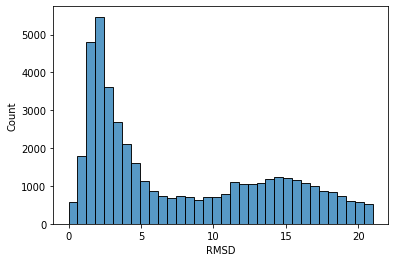

In [ ]:
sns.histplot(data=df_pro, x="RMSD")

A simple vista se ven 2 picos, uno en 2,5 Armstrong y otro en 15 Armstrong. Estos valores se deberian ver reflejados en el resto de los features.



<Figure size 432x288 with 0 Axes>

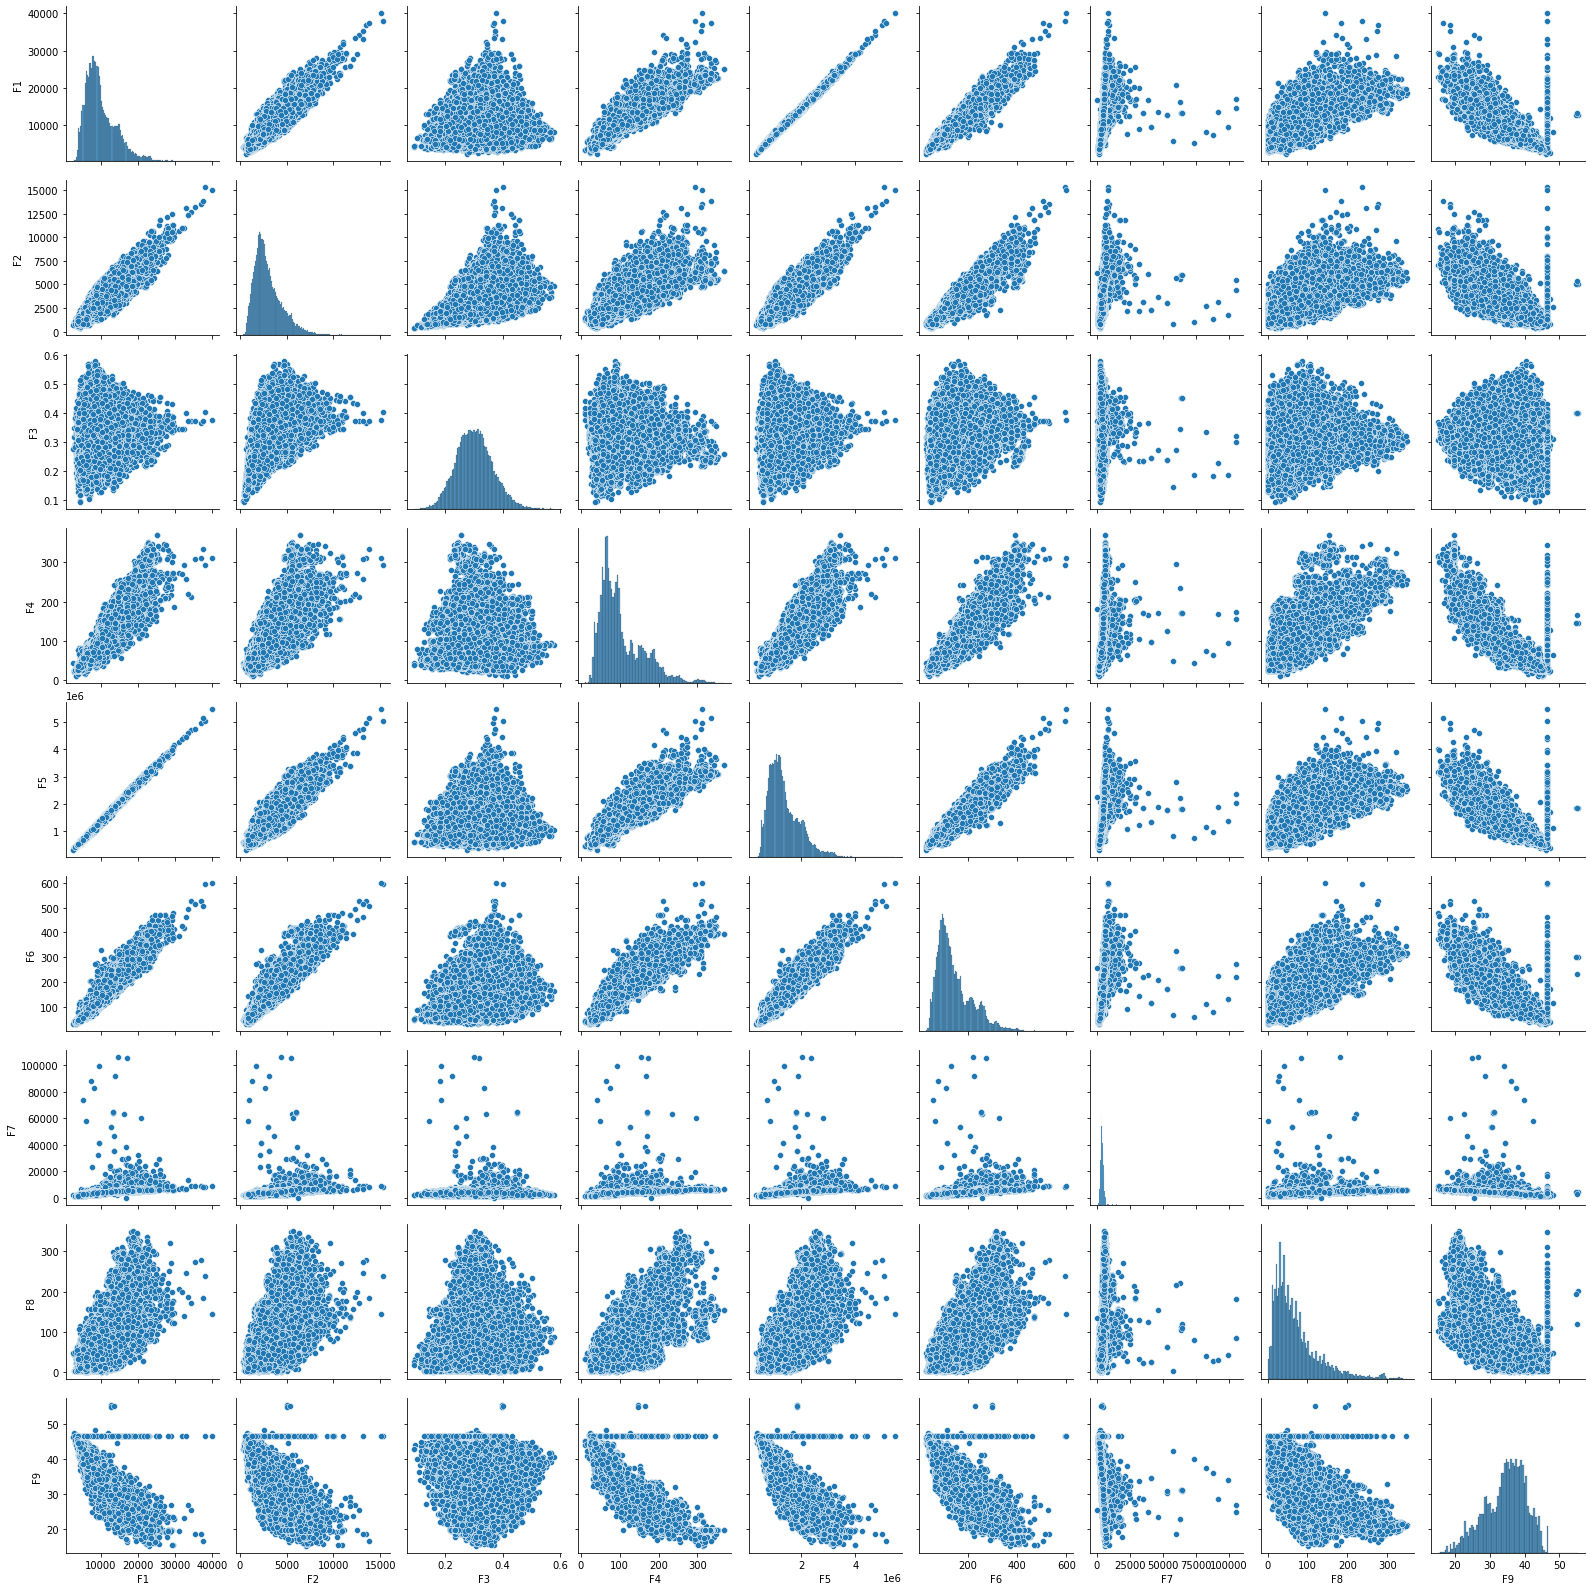

In [ ]:
plt.figure()
sns.pairplot(df_pro[features_pro])
plt.show()



Los datos de cada feature son muy dispares entre si teniendo en cuenta sus valores, es por eso que se normalizan para que sean facilmente comparables. Con normalizar me refiero a que el minimo va a ser 0 y el maximo va a ser 1 para todos los features. Se nota que hay una relacion lineal entre F1 (Total surface area), F5 (Molecular mass weighted exposed area) y F6 (Average deviation from standard exposed area of residue) ya que todas estan relacionadas con el area de superficie. Es posible que sea irrelevante utilizar los tres atributos en los modelos. 

Por otro lado, ninguna de las variables analizadas demostró una repetición de variables importante como si se vió en la base de datos anterior. La unica puede ser F7 (Distancia euclidiana) que basicamente es medir una distancia utilizando el teorema de Pitágoras pero no dice que puntos son los que se miden. Sin embargo, esta distancia presenta variaciones asi que se la tomará como relevante.

In [ ]:
df_pro_n = df_pro.copy()
df_pro_n[features_pro] = (df_pro_n[features_pro] - df_pro_n[features_pro].min())/(df_pro_n[features_pro].max()-df_pro_n[features_pro].min())

In [ ]:
df_pro_n.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,0.198698,0.175327,0.432597,0.259556,0.203553,0.200671,0.037658,0.199929,0.481514
std,6.118312,0.107806,0.098221,0.129611,0.154384,0.109468,0.123578,0.018817,0.161410,0.149222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.305000,0.120730,0.105681,0.342629,0.148336,0.123066,0.110846,0.029876,0.088571,0.379227
50%,5.030000,0.172855,0.151904,0.427977,0.215680,0.178113,0.166312,0.036246,0.154286,0.500870
75%,13.379000,0.258591,0.226911,0.516066,0.343550,0.266167,0.263927,0.043835,0.260000,0.589995
max,20.999000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Clasificador

#### Regresión Lineal

In [ ]:
# Proteins LogisticRegression

df_pro_n = df_pro_n.sample(frac=1)
clf = LinearRegression()
array_mse = []
array_r2 = []


# k = 3

kbest_3 = SelectKBest(k=3).fit_transform(df_pro_n[features_pro],df_pro_n['RMSD'])
cv_3 = cross_validate(estimator=clf,X=kbest_3,y=df_pro_n['RMSD'],cv=6,scoring=('neg_mean_squared_error','r2'))
mse_test = np.mean(cv_3['test_neg_mean_squared_error'])
r2_test = np.mean(cv_3['test_r2'])

array_mse.append(mse_test)
array_r2.append(r2_test)


print("Usando 3 atributos los resultados del clasificador son: ")
print("MSE =",mse_test)
print("R2 =",r2_test)
print("-------------------------------------------------------")

# k = 4
kbest_4 = SelectKBest(k=4).fit_transform(df_pro_n[features_pro],df_pro_n['RMSD'])
cv_4 = cross_validate(estimator=clf,X=kbest_4,y=df_pro_n['RMSD'],cv=6,scoring=('neg_mean_squared_error','r2'))
mse_test = np.mean(cv_4['test_neg_mean_squared_error'])
r2_test = np.mean(cv_4['test_r2'])

array_mse.append(mse_test)
array_r2.append(r2_test)


print("Usando 4 atributos los resultados del clasificador son: ")
print("Macro =",mse_test)
print("Micro =",r2_test)
print("-------------------------------------------------------")

# k = 5
kbest_5 = SelectKBest(k=5).fit_transform(df_pro_n[features_pro],df_pro_n['RMSD'])
cv_5 = cross_validate(estimator=clf,X=kbest_5,y=df_pro_n['RMSD'],cv=6,scoring=('neg_mean_squared_error','r2'))
mse_test = np.mean(cv_5['test_neg_mean_squared_error'])
r2_test = np.mean(cv_5['test_r2'])

array_mse.append(mse_test)
array_r2.append(r2_test)


print("Usando 5 atributos los resultados del clasificador son: ")
print("Macro =",mse_test)
print("Micro =",r2_test)
print("-------------------------------------------------------")

# k = 6
kbest_6 = SelectKBest(k=6).fit_transform(df_pro_n[features_pro],df_pro_n['RMSD'])
cv_6 = cross_validate(estimator=clf,X=kbest_6,y=df_pro_n['RMSD'],cv=6,scoring=('neg_mean_squared_error','r2'))
mse_test = np.mean(cv_6['test_neg_mean_squared_error'])
r2_test = np.mean(cv_6['test_r2'])

array_mse.append(mse_test)
array_r2.append(r2_test)


print("Usando 6 atributos los resultados del clasificador son: ")
print("Macro =",mse_test)
print("Micro =",r2_test)
print("-------------------------------------------------------")

# k = 7
kbest_7 = SelectKBest(k=7).fit_transform(df_pro_n[features_pro],df_pro_n['RMSD'])
cv_7 = cross_validate(estimator=clf,X=kbest_6,y=df_pro_n['RMSD'],cv=6,scoring=('neg_mean_squared_error','r2'))
mse_test = np.mean(cv_7['test_neg_mean_squared_error'])
r2_test = np.mean(cv_7['test_r2'])

array_mse.append(mse_test)
array_r2.append(r2_test)


print("Usando 7 atributos los resultados del clasificador son: ")
print("Macro =",mse_test)
print("Micro =",r2_test)
print("-------------------------------------------------------")

# Final
max_mse = max(array_mse)
max_r2 = max(array_r2)


print("MSE dio mejor resultado con",array_mse.index(max_mse)+3,"atributo/s")
print("R2 dio mejor resultado con",array_r2.index(max_r2)+3,"atributo/s")

Usando 3 atributos los resultados del clasificador son: 
MSE = -31.54432795926209
R2 = 0.15711990862638153
-------------------------------------------------------
Usando 4 atributos los resultados del clasificador son: 
Macro = -31.211559980435922
Micro = 0.16601389378593717
-------------------------------------------------------
Usando 5 atributos los resultados del clasificador son: 
Macro = -29.57150142460972
Micro = 0.2098622889405122
-------------------------------------------------------
Usando 6 atributos los resultados del clasificador son: 
Macro = -29.559509325796796
Micro = 0.21018200658392794
-------------------------------------------------------
Usando 7 atributos los resultados del clasificador son: 
Macro = -29.559509325796796
Micro = 0.21018200658392794
-------------------------------------------------------
MSE dio mejor resultado con 6 atributo/s
R2 dio mejor resultado con 6 atributo/s


#### Features Polinomiales

Se pide hacer ingeniería de features generando features polinomiales y evaluar con un conjunto de validación cuál es la mejor elección de features polinomiales.


In [ ]:
polino2 = pd.DataFrame(PolynomialFeatures(2).fit_transform(df_pro_n[features_pro],df_pro_n['RMSD']))
features2_polino2 = polino2.columns
polino2['RMSD'] = df_pro_n['RMSD'].values
polino3 = pd.DataFrame(PolynomialFeatures(3).fit_transform(df_pro_n[features_pro],df_pro_n['RMSD']))
features3_polino3 = polino3.columns
polino3['RMSD'] = df_pro_n['RMSD'].values

In [ ]:
polino2.describe()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,RMSD
count,45730.0,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,...,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000
mean,1.0,0.198698,0.175327,0.432597,0.259556,0.203553,0.200671,0.037658,0.199929,0.481514,...,0.008808,0.053336,0.080362,0.001772,0.008583,0.016669,0.066024,0.080919,0.254122,7.748528
std,0.0,0.107806,0.098221,0.129611,0.154384,0.109468,0.123578,0.018817,0.161410,0.149222,...,0.009702,0.074739,0.030920,0.011134,0.010260,0.007166,0.115871,0.049455,0.135993,6.118312
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.120730,0.105681,0.342629,0.148336,0.123066,0.110846,0.029876,0.088571,0.379227,...,0.003346,0.009987,0.061042,0.000893,0.002704,0.014986,0.007845,0.043924,0.143813,2.305000
50%,1.0,0.172855,0.151904,0.427977,0.215680,0.178113,0.166312,0.036246,0.154286,0.500870,...,0.005974,0.023770,0.078700,0.001314,0.005230,0.016822,0.023804,0.071904,0.250870,5.030000
75%,1.0,0.258591,0.226911,0.516066,0.343550,0.266167,0.263927,0.043835,0.260000,0.589995,...,0.011400,0.062236,0.097492,0.001921,0.010850,0.018072,0.067600,0.109280,0.348094,13.379000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.425421,0.696804,0.781536,1.000000,0.520000,0.441529,1.000000,0.777070,1.000000,20.999000


Para el polinomio de orden 2 se realizaron 55 features en total.

In [ ]:
def PoliLinearRegMetrics(poli: pd.DataFrame , feats: list , k: int):
  poli = poli.sample(frac=1)
  kbest = SelectKBest(k=k).fit_transform(poli[feats],poli['RMSD'])
  cv = cross_validate(estimator=LinearRegression(),X=kbest,y=poli['RMSD'],cv=6,scoring=('neg_mean_squared_error','r2'))
  mse_test = np.mean(cv['test_neg_mean_squared_error'])
  r2_test = np.mean(cv['test_r2'])

  return mse_test,r2_test

In [ ]:
array_mse = []
array_r2 = []
x = [1,5,10,15,20,25,30,35,40,45,50,55]

for i in x:
  mse_test,r2_test = PoliLinearRegMetrics(polino2,features2_polino2,int(i))
  array_mse.append(mse_test)
  array_r2.append(r2_test)

max_mse = max(array_mse)
max_r2 = max(array_r2)

k_max_mse = (array_mse.index(max_mse)+1)*5-5
k_max_r2 =  (array_r2.index(max_r2)+1)*5-5
            
print("MSE dio mejor resultado con", k_max_mse,"feature/s donde MSE =",max_mse)
print("R2 dio mejor resultado con",k_max_r2,"feature/s donde R2 =",max_r2)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/li

MSE dio mejor resultado con 55 feature/s donde MSE = -23.77189696273224
R2 dio mejor resultado con 55 feature/s donde R2 = 0.36485389184289446


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:99: UserWarning: Features [0] are constant.
  square_of_sums_args = [s ** 2 for s in sums_args]
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:99: RuntimeWarning: invalid value encountered in true_divide
  square_of_sums_args = [s ** 2 for s in sums_args]


De esta manera se puede ver que en el caso del polinomio de orden 2 se obtienen mejores resultados con 55 features con un MSE de -23.77 y un R2 de 0.36 aproximadamente.

In [ ]:
polino3.describe()

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,RMSD
count,45730.0,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,...,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000
mean,1.0,0.198698,0.175327,0.432597,0.259556,0.203553,0.200671,0.037658,0.199929,0.481514,...,0.000456,0.000715,0.003128,0.003149,0.008255,0.030694,0.022076,0.037984,0.142237,7.748528
std,0.0,0.107806,0.098221,0.129611,0.154384,0.109468,0.123578,0.018817,0.161410,0.149222,...,0.003472,0.004407,0.006726,0.002747,0.004492,0.087482,0.029676,0.026864,0.104397,6.118312
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.120730,0.105681,0.342629,0.148336,0.123066,0.110846,0.029876,0.088571,0.379227,...,0.000082,0.000495,0.000239,0.001445,0.006189,0.000695,0.004022,0.019131,0.054538,2.305000
50%,1.0,0.172855,0.151904,0.427977,0.215680,0.178113,0.166312,0.036246,0.154286,0.500870,...,0.000183,0.000607,0.000806,0.002594,0.008796,0.003673,0.011410,0.032014,0.125653,5.030000
75%,1.0,0.258591,0.226911,0.516066,0.343550,0.266167,0.263927,0.043835,0.260000,0.589995,...,0.000459,0.000692,0.002773,0.004170,0.010111,0.017576,0.028451,0.052322,0.205374,13.379000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.520000,0.413456,0.270400,0.149594,0.262903,1.000000,0.772629,0.607308,1.000000,20.999000


Para el polinomio de orden 3 se realizaron 220 features en total.

In [ ]:
array_mse = []
array_r2 = []
a = np.linspace(1,219,219)
x = a[a % 2 == 1] #me quedo con impares sino tarda muchisimo

for i in x:
  mse_test,r2_test = PoliLinearRegMetrics(polino3,features3_polino3,int(i))
  array_mse.append(mse_test)
  array_r2.append(r2_test)

max_mse = max(array_mse)
max_r2 = max(array_r2)

k_max_mse = (array_mse.index(max_mse)+1)
k_max_r2 =  (array_r2.index(max_r2)+1)
            


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/li

In [ ]:
print("MSE dio mejor resultado con", k_max_mse*2+1,"feature/s donde MSE =",max_mse)
print("R2 dio mejor resultado con",k_max_r2*2+1,"feature/s donde R2 =",max_r2)

MSE dio mejor resultado con 139 feature/s donde MSE = -22.954130698315414
R2 dio mejor resultado con 139 feature/s donde R2 = 0.38672762319870896


De esta manera se puede ver que en el caso del polinomio de orden 3 se obtienen mejores resultados con 139 features con un MSE de -22.4 y un R2 de 0.39 aproximadamente. Este último es aquel que obtuvo mejores métricas.